For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.
Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic Regression model on the training data.
Fit a Knn Classifier model on the training data



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

## Data import and exploration

In [4]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
churnData["TotalCharges"] = pd.to_numeric(churnData.TotalCharges, errors='coerce')

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
churnData[churnData['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [9]:
churnData['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### replace null values

In [10]:
from sklearn.impute import KNNImputer # Import KNeighborsClassifier to use the K-NN for classification

In [11]:
churnData.dropna(inplace = True)

### Using logistic Regression 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [13]:
def x_y_to_1_0(value:[str]=None, x="No", y="Yes"):
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        return None

In [14]:
churnData["Churn"] = list(map(x_y_to_1_0, churnData["Churn"]))

In [15]:
X = churnData.drop('Churn', axis=1)

y = churnData['Churn']

In [16]:
## numeric categorical split
X_numeric = X._get_numeric_data()
X_numeric
X_categorical = X.select_dtypes(np.object)

/var/folders/g0/t2l0bdnj06l1ns109451lxvw0000gp/T/ipykernel_2576/760936284.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_categorical = X.select_dtypes(np.object)


In [17]:
X_numeric 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [18]:
X_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   Partner           7032 non-null   object
 2   Dependents        7032 non-null   object
 3   PhoneService      7032 non-null   object
 4   OnlineSecurity    7032 non-null   object
 5   OnlineBackup      7032 non-null   object
 6   DeviceProtection  7032 non-null   object
 7   TechSupport       7032 non-null   object
 8   StreamingTV       7032 non-null   object
 9   StreamingMovies   7032 non-null   object
 10  Contract          7032 non-null   object
dtypes: object(11)
memory usage: 659.2+ KB


In [19]:
## creates dummies
X_categorical=pd.get_dummies(X_categorical, drop_first=True) 

In [20]:
X_categorical

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X = pd.concat([X_numeric, X_categorical], axis=1)
##X = X_numeric

In [22]:
## train test split 
log_model = LogisticRegression() ## assign logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11) ## split

## assigning the function
trans = PowerTransformer()

In [23]:
## fit the transformer on the train set 
trans.fit(X_train)

PowerTransformer()

In [24]:
## transform the train and test sets 
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

In [25]:
## create the model base on training set
log_model.fit(X_train_mod, y_train)

LogisticRegression()

In [26]:
## use model to predict
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

In [27]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})


,Error_metric,Train,Test
0,Accuracy,0.809600,0.776830
1,Precision,0.842937,0.808341
2,Recall,0.912133,0.902874


Confusion matrix for the train set
[[ 765  706]
 [ 365 3789]]


/Users/muhammad/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


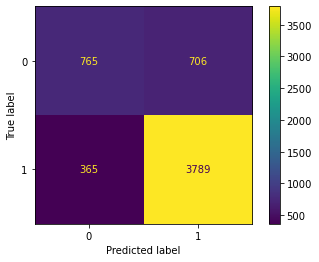



Confusion matrix for the test set
[[182 216]
 [ 98 911]]


/Users/muhammad/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


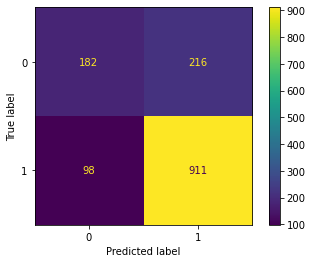

In [28]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

In [31]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [32]:
neigh.fit(X_train_mod, y_train)

KNeighborsRegressor(n_neighbors=10)

In [33]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

/Users/muhammad/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/Users/muhammad/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,Error_metric,Train,Test
0,Mean error,-0.44,-0.48
1,Mean absolute error,0.45,0.49
2,Mean squared error,0.77,0.83
3,Root mean squared error,0.88,0.91
4,Mean absolute percentual error,44.82,48.41
5,R2,-0.34,-0.38


In [34]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,0.06,0.04
1,2,Mean absolute error,0.23,0.54
2,2,Mean squared error,0.22,0.72
3,2,Root mean squared error,0.47,0.85
4,2,Mean absolute percentual error,14.11,35.58
...,...,...,...,...
1,20,Mean absolute error,0.50,0.56
2,20,Mean squared error,0.41,0.50
3,20,Root mean squared error,0.64,0.71
4,20,Mean absolute percentual error,30.85,35.29


In [35]:
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.62,-0.21
5,3,R2,0.50,-0.08
5,4,R2,0.43,-0.03
5,5,R2,0.39,0.02
5,6,R2,0.36,0.06
5,7,R2,0.34,0.09
5,8,R2,0.33,0.12
5,9,R2,0.32,0.13
5,10,R2,0.31,0.14
5,11,R2,0.31,0.15


In [36]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,0.06
1,2,Mean absolute error,Train,0.23
2,2,Mean squared error,Train,0.22
3,2,Root mean squared error,Train,0.47
4,2,Mean absolute percentual error,Train,14.11
...,...,...,...,...
223,20,Mean absolute error,Test,0.56
224,20,Mean squared error,Test,0.50
225,20,Root mean squared error,Test,0.71
226,20,Mean absolute percentual error,Test,35.29


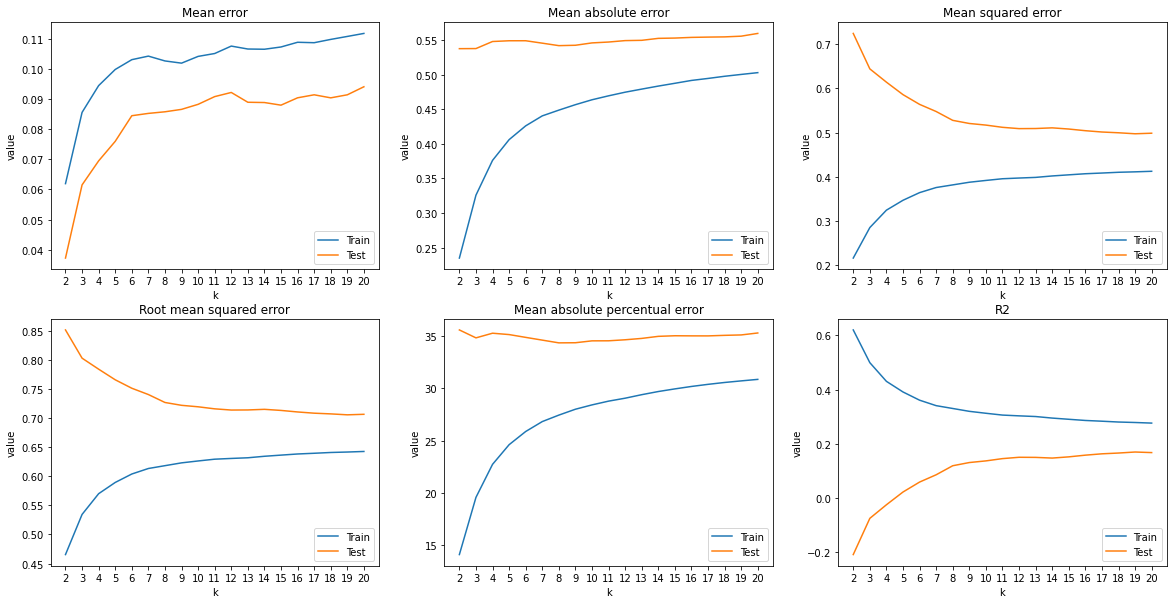

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

In [42]:
## data interpretations techniques 

## Decision trees

Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.

In [43]:
y_train

6740    0
5724    0
6719    1
3298    1
2629    0
       ..
1297    1
4030    1
5208    1
3781    1
1950    0
Name: Churn, Length: 5625, dtype: int64

In [44]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
6740,1,40,79.20,3233.85,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5724,0,1,71.35,71.35,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6719,0,72,25.75,1864.20,1,1,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1
3298,0,4,20.05,83.30,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
2629,0,2,70.70,140.70,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0,5,75.60,402.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4030,0,5,51.00,286.80,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5208,0,14,59.45,780.85,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3781,0,29,19.10,529.50,1,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0


,Error_metric,Train,Test
0,Accuracy,0.79,0.76
1,Precision,0.81,0.79
2,Recall,0.93,0.92


Confusion matrix for the train set
[[ 556  294]
 [ 915 3860]]


/Users/muhammad/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


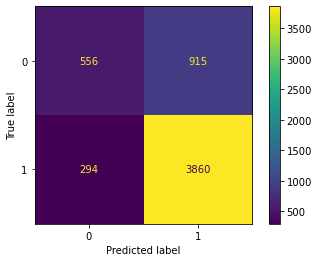



Confusion matrix for the test set
[[150  85]
 [248 924]]


/Users/muhammad/opt/anaconda3/envs/DA_Environment/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


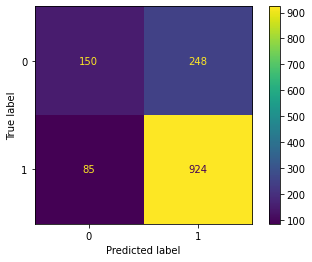

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=5, random_state = 123, min_samples_leaf = 5, max_features = 5)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

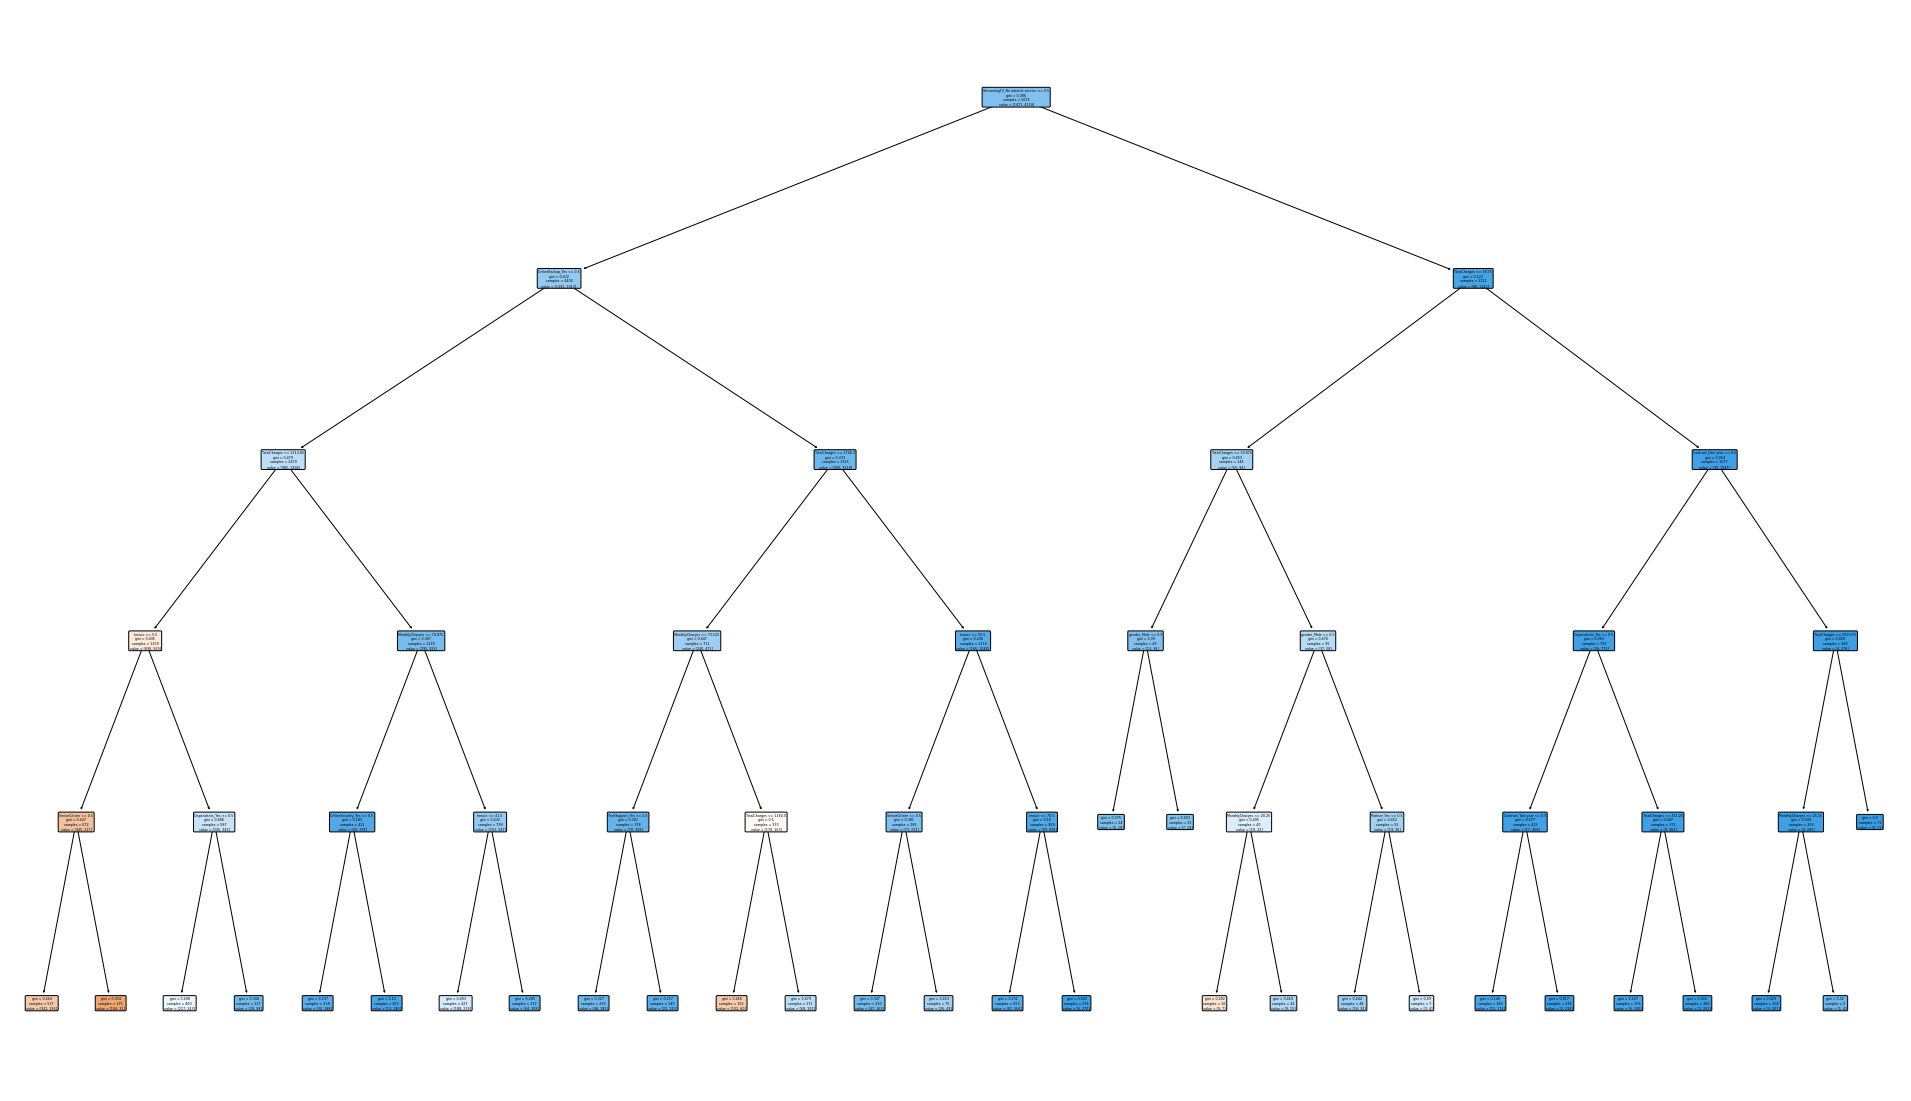

In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

Round 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.


## Cross validation

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print(X_train.shape)
model.score(X_test, y_test)

(120, 4)


0.8333333333333334

In [56]:
scores=cross_val_score(model, X_train, y_train, cv=10)
scores

array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
       1.        , 0.91666667, 1.        , 0.91666667, 1.        ])

In [57]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.04


In [58]:
X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
mo= DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

(150, 4)
(150,)


0.9666666666666667

In [59]:
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
mo= DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

(150, 4)
(150,)


0.9

In [60]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.95833333, 1.        , 1.        , 0.91666667, 0.95833333])

In [62]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.03


In [63]:
y_test

array([2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 0])

In [64]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 1, 1, 0, 0])

In [65]:
model1 = DecisionTreeRegressor()

model2 = LinearRegression()

model3 = KNeighborsRegressor()


model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores) 

{'Regression Tree': 0.9479543127871819, 'Linear Regression': 0.921029068815384, 'KNN': 0.9580465800061899}


Round 4

fit a Random forest Classifier on the data and compare the accuracy.
tune the hyper paramters with gridsearch and check the results.
Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.